# Closed Form Solution of Locally Weighted Regression

### $$\theta = (X^TWX)^{-1}X^TWY$$

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

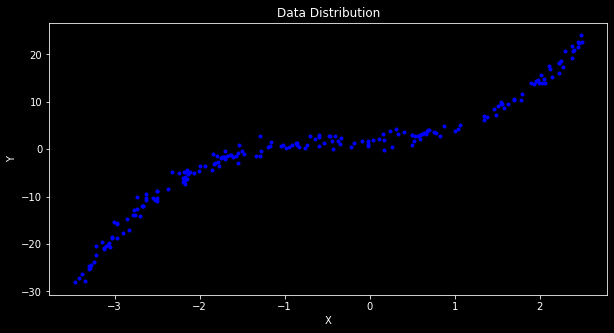

In [125]:
X = 6 * np.random.rand(200, 1) - 3.5
y = 0.9 * X**3 + 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.9x^3 + 0.8x^2 + 0.9x + 2
#visualize the data
plt.figure(figsize=(10,5))
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Distribution")
plt.show()

In [54]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


### Normalise Data

In [126]:
u = X.mean()
std = X.std()

X = (X - u) / std

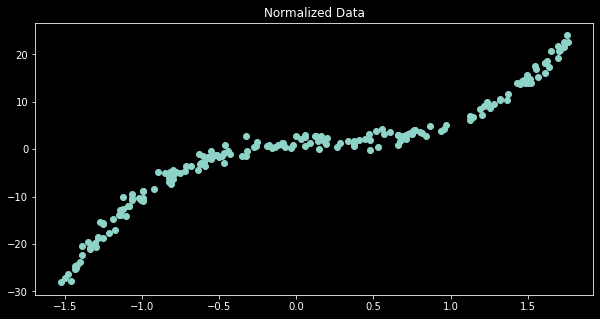

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.title("Normalized Data")
plt.show()

### Generate $W_{(m*m)}$ for every query point

### $W_{(m*m)} = e^\frac{-(X_i - X)^2}{2\tau^2}$
where, $X_i$ is any training point, $X$ is the query point, $\tau$ is the bandwidth parameter

and $(X_i - X)^2$ is calculated as - 

#### $(X_i - X)^2 = (X_i - X)(X_i - X)^T$

In [20]:
print(type(np.mat(np.eye(5))))

<class 'numpy.matrix'>


In [128]:
def get_W(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        W[i, i] = np.exp(-np.dot((X[i] - query_point), (X[i] - query_point).T) / (2 * tau ** 2))
        
    return W

In [129]:
X_copy = X
y_copy = y

In [130]:
X = np.mat(X)
Y = np.mat(y)
M = X.shape[0]

W = get_W(-1, X, 1.1)
print(W.shape)
print(W)


(200, 200)
[[0.99810649 0.         0.         ... 0.         0.         0.        ]
 [0.         0.82748347 0.         ... 0.         0.         0.        ]
 [0.         0.         0.04524843 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.92053419 0.         0.        ]
 [0.         0.         0.         ... 0.         0.98682321 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99998474]]


### Make predictions
No training --> Directly make predictions using `Closed Form Solution`

In [131]:
def predict(X, y, query_x, tau):
    ones = np.ones((X.shape[0], 1))
    X_ = np.hstack((X, ones))
    
    qx = np.mat([query_x, 1])
    
    W = get_W(query_x, X_, tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_)) * (X_.T*(W*Y))
    
    pred = np.dot(qx, theta)
    
    return theta, pred

In [132]:
theta, pred = predict(X, Y, 1.0, 1.0)

pred

matrix([[8.96262485]])

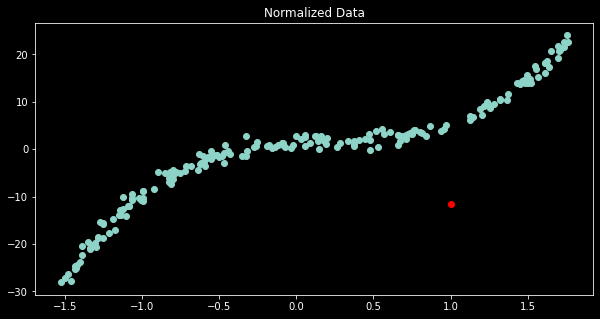

In [138]:
plt.figure(figsize=(10,5))
plt.scatter(np.array(X).reshape(1, -1), y)
plt.plot(1, np.array(pred)[0][0], 'ro')
plt.title("Normalized Data")
plt.show()

In [157]:
# Prediction for all the points
y_pred = []
for x in X_copy:
    theta, pred = predict(X, Y, x[0], 0.2)
    y_pred.append(np.array(pred)[0])

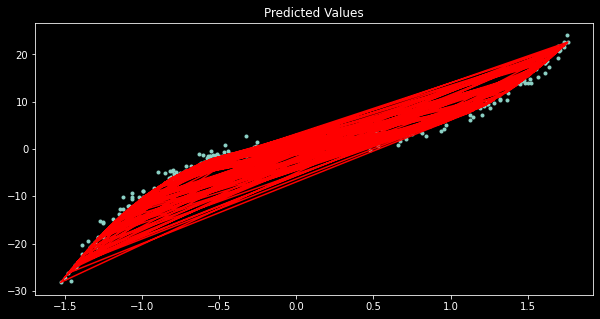

In [160]:
# Plotting the predicted values
plt.figure(figsize=(10,5))
plt.plot(X_copy, y_copy, '.')
plt.plot(X_copy, y_pred, 'r-')
plt.title("Predicted Values")
plt.show()

### Find the best value of $\tau$(Bandwidth Parameter) [Cross Validation]